<a href="https://colab.research.google.com/github/avi-007/Deep-Learning-Work/blob/master/Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.layers import Embedding
embedding_layer=Embedding(1000,64)

In [0]:
from keras.datasets import imdb
from keras import preprocessing

max_features=10000
maxlen=20

(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=max_features)
x_train=preprocessing.sequence.pad_sequences(x_train,maxlen=maxlen)
x_test=preprocessing.sequence.pad_sequences(x_test,maxlen=maxlen)

17465344/17464789 [==============================] - 1s 0us/step


In [0]:
from keras.models import Sequential
from keras.layers import Flatten,Dense
model=Sequential()
model.add(Embedding(10000,8,input_length=maxlen))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
model.summary()

history=model.fit(x_train,y_train,
                  epochs=10,
                  batch_size=32,
                  validation_split=0.2)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________



Train on 20000 samples, validate on 5000 samples
Epoch 1/10





20000/20000 [==============================] - 12s 604us/step - loss: 0.6769 - acc: 0.5992 - val_loss: 0.6340 - val_acc: 0.6970
Epoch 2/10
20000/20000 [==============================] - 2s 106us/step - loss: 0.5578

In [0]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -q -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 145113 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.5_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.5) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 163kB 24.2MB/s 


In [0]:
!unzip '/Downloads/glove.6B'

unzip:  cannot find or open /Downloads/glove.6B, /Downloads/glove.6B.zip or /Downloads/glove.6B.ZIP.


In [0]:
import os

imdb_dir = '/home/avinash/Downloads/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_samples = 200  
validation_samples = 10000  
max_words = 10000  

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Using TensorFlow backend.


Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [0]:
glove_dir = '/home/avinash/Downloads/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [0]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 2s 12ms/step - loss: 2.1728 - acc: 0.4850 - val_loss: 1.2828 - val_acc: 0.4948
Epoch 2/10
200/200 [==============================] - 2s 8ms/step - loss: 0.6859 - acc: 0.6900 - val_loss: 0.7570 - val_acc: 0.5394
Epoch 3/10
200/200 [==============================] - 2s 8ms/step - loss: 0.2630 - acc: 0.9000 - val_loss: 0.7147 - val_acc: 0.5751
Epoch 4/10
200/200 [==============================] - 2s 8ms/step - loss: 0.2752 - acc: 0.9000 - val_loss: 0.8886 - val_acc: 0.5362
Epoch 5/10
200/200 [==============================] - 2s 9ms/step - loss: 0.0967 - acc: 0.9950 - val_loss: 0.8010 - val_acc: 0.5565
Epoch 6/10
200/200 [==============================] - 1s 6ms/step - loss: 0.1031 - acc: 0.9900 - val_loss: 2.1700 - val_acc: 0.4958
Epoch 7/10
200/200 [==============================] - 1s 5ms/step - loss: 0.2512 - acc: 0.8950 - val_loss: 1.7194 - val_acc: 0.5067
Epoch 8/10
200/200 [=======

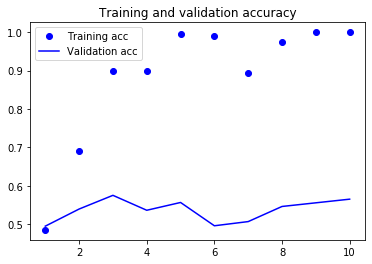

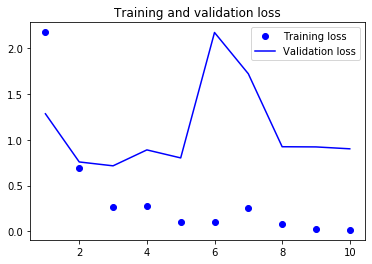

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


/home/avinash/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 2s 12ms/step - loss: 0.6946 - acc: 0.4950 - val_loss: 0.6922 - val_acc: 0.5158
Epoch 2/10
200/200 [==============================] - 2s 11ms/step - loss: 0.5017 - acc: 1.0000 - val_loss: 0.6958 - val_acc: 0.5183
Epoch 3/10
200/200 [==============================] - 2s 8ms/step - loss: 0.2780 - acc: 0.9950 - val_loss: 0.7000 - val_acc: 0.5201
Epoch 4/10
200/200 [==============================] - 1s 6ms/step - loss: 0.1196 - acc: 1.0000 - val_loss: 0.6982 - val_acc: 0.5267
Epoch 5/10
200/200 [==============================] - 1s 6ms/step - loss: 0.0549 - acc: 1.0000 - val_loss: 0.7026 - val_acc: 0.5298
Epoch 6/10
200/200 [==============================] - 1s 6ms/step - loss: 0.0290 - acc: 1.0000 - val_loss: 0.7121 - val_acc: 0.5284
Epoch 7/10
200/200 [==============================] - 1s 6ms/step - loss: 0.0161 - acc: 1.0000 - val_loss: 0.7452 - val_acc: 0.5223
Epoch 8/10
200/200 [======

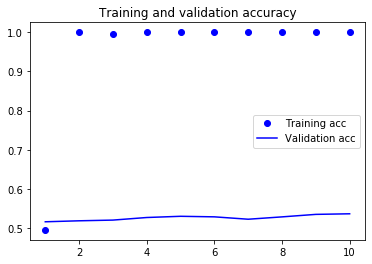

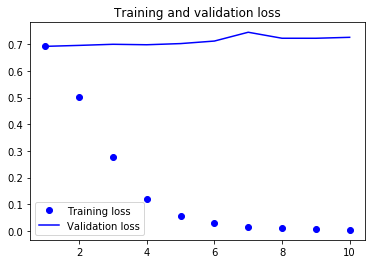

In [0]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [0]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 4s 167us/step


[0.9030548684358597, 0.5582799911499023]